In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import root_mean_squared_error
from ase.io import read
from matplotlib import pyplot as plt

from shiftml.ase import ShiftML
import urllib.request


def extract_from_array(array, num_atoms, list_atom):
    """
    Function to extract regression array from a given
    symbol list of atoms and data exported from the model
    """
    num_molecules = int(len(array) / num_atoms)
    data_fit = array.reshape((-1, num_molecules))[:, 0]
    X = []
    for atom_string in list_atom:
        label_list = atom_string.split(",")
        if len(label_list) == 1:
            label = int(label_list[0])
            X.append(data_fit[label - 1])
        else:
            X.append(
                sum([data_fit[int(label_str) - 1] for label_str in label_list])
                / len(label_list)
            )
    return np.array(X)


def structure_prediction(
    model_version, frames, list_atom, list_cs, GIPAW_avail=True, cs_sym="CS"
):
    """
    Function to select the suitable structures
    based on a set of candidate structures,
    given rmse of the linear regression results

    Parameters
    ----------
    model_version : str
        The version of the ShiftML model to use. Supported versions are
        "ShiftML1.0", "ShiftML1.1", and "ShiftML2.0".
    frames : List[ase.Atoms]
        A list of candidate structures.
    list_atom : np.array(List[str])
        An array of atom symbols included in the structure.
    list_cs: np.array(List[float])
        An array of chemical shielding values corresponding to the atom symbols.
    """
    calculator = ShiftML(model_version)
    number_list = list_atom[-1].split(",")
    num_atoms = float(number_list[-1])
    rmse_rec1 = np.array([])
    rmse_rec2 = np.array([])

    for frame in frames:
        Y = list_cs
        atom_label = frame.get_atomic_numbers() == 1
        array = calculator.get_cs_iso(frame).ravel()[atom_label]
        X = extract_from_array(array, num_atoms, list_atom)
        slope = -1
        intercept = np.mean(Y) - slope * np.mean(X)
        rmse = root_mean_squared_error(slope * X + intercept, Y)
        rmse_rec1 = np.append(rmse_rec1, rmse)
        if GIPAW_avail:
            array = frame[atom_label].arrays[cs_sym].ravel()
            X = extract_from_array(array, num_atoms, list_atom)
            slope = -1
            intercept = np.mean(Y) - slope * np.mean(X)
            rmse = root_mean_squared_error(slope * X + intercept, Y)
            rmse_rec2 = np.append(rmse_rec2, rmse)
            rmse_rec = (rmse_rec1, rmse_rec2)
        else:
            rmse_rec = rmse_rec1

    return rmse_rec


In [24]:
# atoms list defines groups of atoms to average over

list_atom = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
            '11,12,13', '14', '15', '16', '17', '18', '19,20,21']

list_cs =  np.array([3.76, 3.78, 5.63, 3.32, 3.49, 3.06, 2.91, 3.38, 2.56, 2.12, 1.04, 8.01, 8.01,
 8.01, 8.01, 8.01, 3.78])

In [25]:
urllib.request.urlretrieve("https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-018-06972-x/MediaObjects/41467_2018_6972_MOESM8_ESM.zip", "cocaine.zip")
import zipfile
with zipfile.ZipFile("cocaine.zip","r") as zip_ref:
    zip_ref.extractall(".")

frames = read("./Supplementary_Dataset_6/cocaine_QuantumEspresso.xyz", ":")

2024-07-30 13:26:15,484 - INFO - rascaline version: 0.1.0.dev558
2024-07-30 13:26:15,485 - INFO - rascaline-torch is installed, importing rascaline-torch
2024-07-30 13:26:15,485 - INFO - Found model version in url_resolve
2024-07-30 13:26:15,486 - INFO - Resolving model version to model files at url: https://tinyurl.com/f237evr3
2024-07-30 13:26:15,486 - INFO - Found ShiftML1.1  in cache,                         and importing it from here: /Users/zhangyuxuan/Library/Caches/shiftml/ShiftML1.1


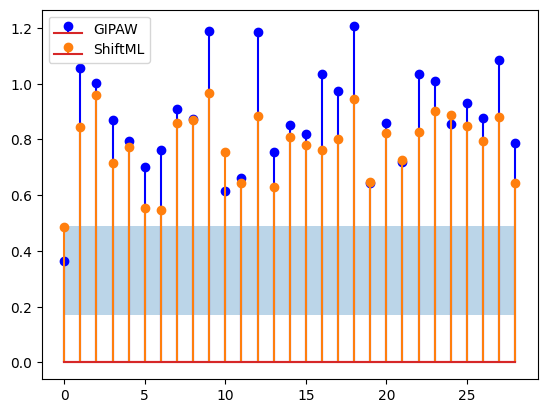

In [26]:
rmse1, rmse2 = structure_prediction("ShiftML1.1", frames, list_atom, list_cs)
sequence = np.array(range(len(rmse1)))
plt.stem(sequence, rmse2, 'b', label='GIPAW')
plt.stem(sequence, rmse1, 'tab:orange', label="ShiftML")
plt.fill_between(sequence, 0.33+0.16, 0.33-0.16, alpha=0.3)
plt.legend()
plt.show()

In [27]:
# atoms list defines groups of atoms to average over

list_atom = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10,11',
            '12', '13', '14', '15', '16,17', '18,19', '20', '21,22', '23,24,25,26,27,28,29,30,31']

list_cs =  np.array([6.92, 8.69, 9.01, 8.47, 15.37, 7.73, 9.64, 2.90, 1.78, 1.88, 
                     1.8, 1.6, 0.44, 1.54, 1.88, 0.8, 1, 1.74, 0.73])

In [30]:
urllib.request.urlretrieve("https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-018-06972-x/MediaObjects/41467_2018_6972_MOESM6_ESM.zip", "AZD.zip")

import zipfile
with zipfile.ZipFile("AZD.zip","r") as zip_ref:
    zip_ref.extractall(".")

frames = read("./Supplementary_Dataset_4/AZD_QuantumEspresso.xyz", ":")

2024-07-30 13:34:45,537 - INFO - rascaline version: 0.1.0.dev558
2024-07-30 13:34:45,539 - INFO - rascaline-torch is installed, importing rascaline-torch
2024-07-30 13:34:45,539 - INFO - Found model version in url_resolve
2024-07-30 13:34:45,540 - INFO - Resolving model version to model files at url: https://tinyurl.com/f237evr3
2024-07-30 13:34:45,542 - INFO - Found ShiftML1.1  in cache,                         and importing it from here: /Users/zhangyuxuan/Library/Caches/shiftml/ShiftML1.1


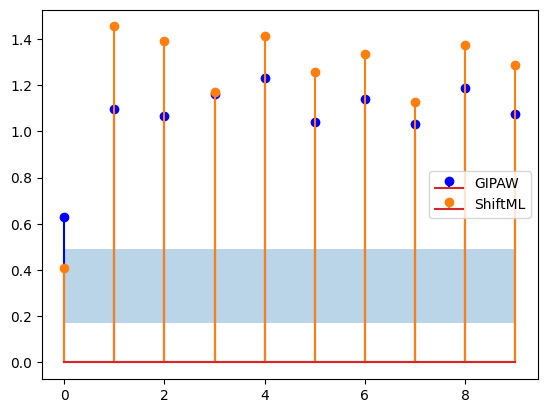

In [31]:
rmse1, rmse2 = structure_prediction("ShiftML1.1", frames, list_atom, list_cs)
sequence = np.array(range(len(rmse1)))
plt.stem(sequence, rmse2, 'b', label='GIPAW')
plt.stem(sequence, rmse1, 'tab:orange', label="ShiftML")
plt.fill_between(sequence, 0.33+0.16, 0.33-0.16, alpha=0.3)
plt.legend()
plt.show()